In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Solución de la parte A

In [121]:
datos={"dia": [1,2,3,4,5,6], 
       "IPMH" : [464, 494, 532, 552, 576, 589] } 
df=pd.DataFrame(datos)
df

,dia,IPMH
0,1,464
1,2,494
2,3,532
3,4,552
4,5,576
5,6,589


In [122]:
a = np.array(df.IPMH*0.002) #incertidumbre 2 por mil
a

array([0.928, 0.988, 1.064, 1.104, 1.152, 1.178])

In [123]:
b = np.random.choice(a, 6) # incertidumbre aleatoria
b

array([0.988, 1.104, 1.064, 1.178, 0.988, 1.152])

In [124]:
c = np.array(df.IPMH - b) # Columna con resta de número aleatorios de su 2 por mil
c

array([463.012, 492.896, 530.936, 550.822, 575.012, 587.848])

In [125]:
datos2={"dia": [1,2,3,4,5,6], 
       "IPMH" : c } 
df1=pd.DataFrame(datos2) #Nuevo DataFrame de los nuevos datos
df1

,dia,IPMH
0,1,463.012
1,2,492.896
2,3,530.936
3,4,550.822
4,5,575.012
5,6,587.848


Solución de la parte B

In [144]:
import numpy as np

In [147]:
d = [1,2,3,4,5,6] # Datos fila "dia"
z = np.polyfit(d, c, 2)
p = np.poly1d(z)
print (p) # Polinomio de segundo grado

        2
-2.511 x + 43.02 x + 420.9


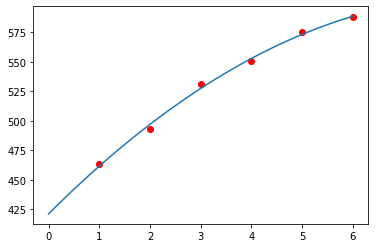

In [149]:
#grafica de los puntos y la del polinomio
xp = np.linspace(0, 6, 100)
plt.plot( d, c, 'ro', xp, p(xp))
plt.show()

In [168]:
# teniendo en cuanta la ecuación de movimiento en caida libre
import sympy as sp 
import scipy.optimize as opt
v0 = z[1] #velocidad inicial
ac = z[0]*2 # aceleración 

deriv = p.deriv()
deriv

raiz = opt.bisect(deriv, 0, 10)
p(raiz) # maximo

605.1728723708758